project name :- customer churn data analysis

project type :- If you focused on understanding churn patterns, visualizing trends, and identifying key features like tenure, contract type, or payment method to help stakeholders understand churn drivers and make strategic decisions.

Project summary :-This project focuses on analyzing customer churn patterns to help businesses understand why customers leave and how to retain them. Using Python and libraries like pandas, matplotlib, seaborn, and scikit-learn, the project explores a telecom dataset to uncover key drivers of churn.
Key Components:
- Exploratory Data Analysis (EDA): Identified trends and correlations between churn and variables such as contract type, tenure, payment method, and monthly charges.
- Data Preprocessing: Handled missing values, encoded categorical variables, and scaled numerical features for modeling.
- Predictive Modeling: Built and evaluated classification models (e.g., Logistic Regression, Random Forest) to predict churn with high accuracy.
- Insights & Recommendations: Provided actionable suggestions to reduce churn, such as targeting customers with month-to-month contracts or high monthly charges.
Impact:
Empowered stakeholders with data-driven insights to improve customer retention strategies and reduce churn-related revenue loss.


project prepared by:- Abhijay Das

coding section :-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# checking null values
df.isnull().sum().sum()

np.int64(0)

In [10]:
# getting description of the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.duplicated().sum()

np.int64(0)

In [15]:
#changing datatype of column
df['TotalCharges']=df['TotalCharges'].replace(' ','0')
df['TotalCharges']=df['TotalCharges'].astype('float')

In [18]:
df.isnull().sum().sum()

np.int64(0)

In [20]:
#converted 0 and 1 value of seniorcitizen to yes and no
def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
        

        


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


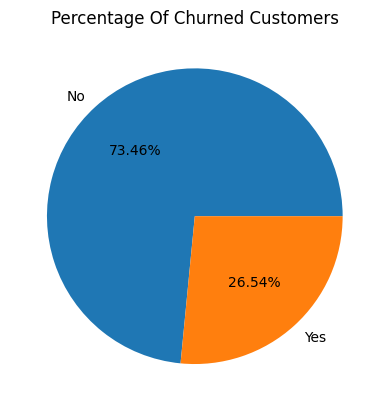

In [10]:

gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct='%1.2f%%')
plt.title('count of customers by churn')
plt.title('Percentage Of Churned Customers')
plt.show()

In [11]:
# from the above chart we found out that 26.54% of the people churned out


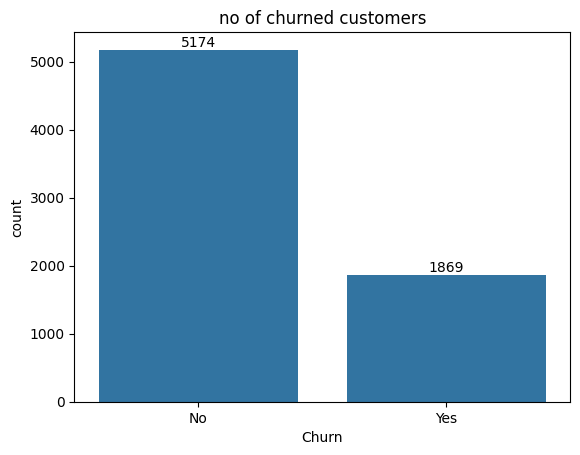

In [6]:
# finding out the no of customers churned out
a= sns.countplot(x='Churn',data = df)
a.bar_label(a.containers[0])
plt.title('no of churned customers')
plt.show()

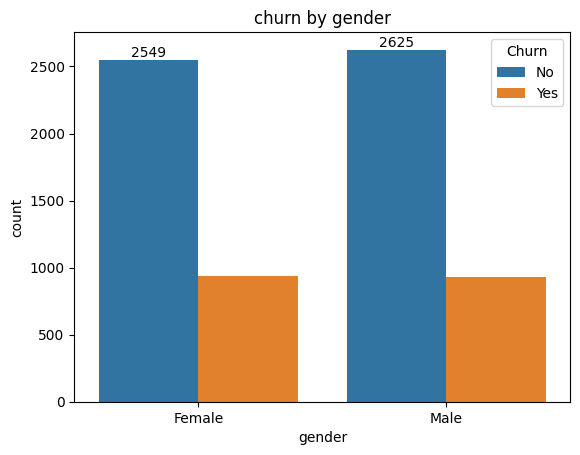

In [15]:
a=sns.countplot(x='gender',data=df,hue='Churn')
a.bar_label(a.containers[0])
plt.title('churn by gender')
plt.show()

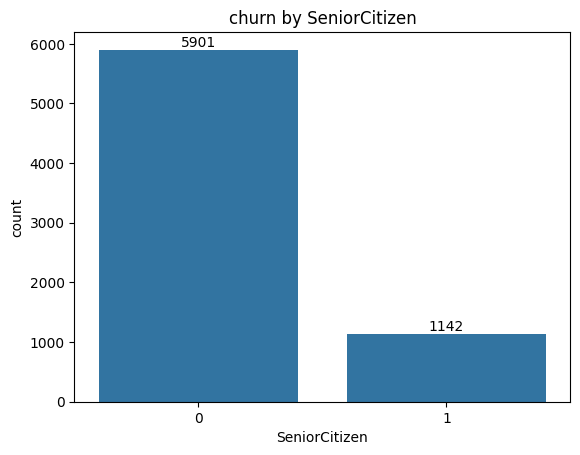

In [17]:
a=sns.countplot(x='SeniorCitizen',data=df)
a.bar_label(a.containers[0])
plt.title('churn by SeniorCitizen')
plt.show()

 comparative a greater percentage of people in senior citizen have churned out

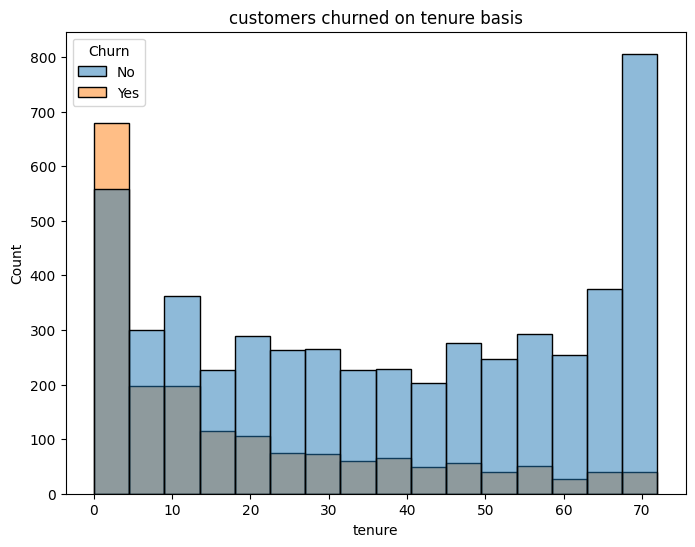

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Telco-Customer-Churn.csv')
plt.figure(figsize=(8,6))
sns.histplot(x='tenure',data = df ,hue='Churn')
plt.title('customers churned on tenure basis')
plt.show()

people who have used our services for 1 or 2 months have churned.

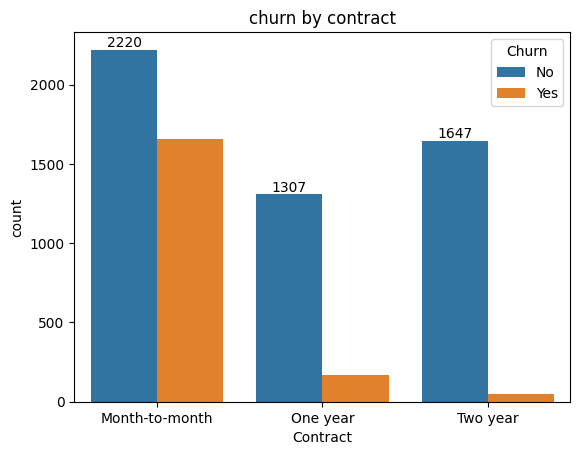

In [30]:
# count of no of churned customers by contract.
a=sns.countplot(x='Contract',data=df,hue='Churn')
a.bar_label(a.containers[0])
plt.title('churn by contract')
plt.show()

In [31]:
#people who have month to month contract are likely to churn than those who have one or two year contract.

In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

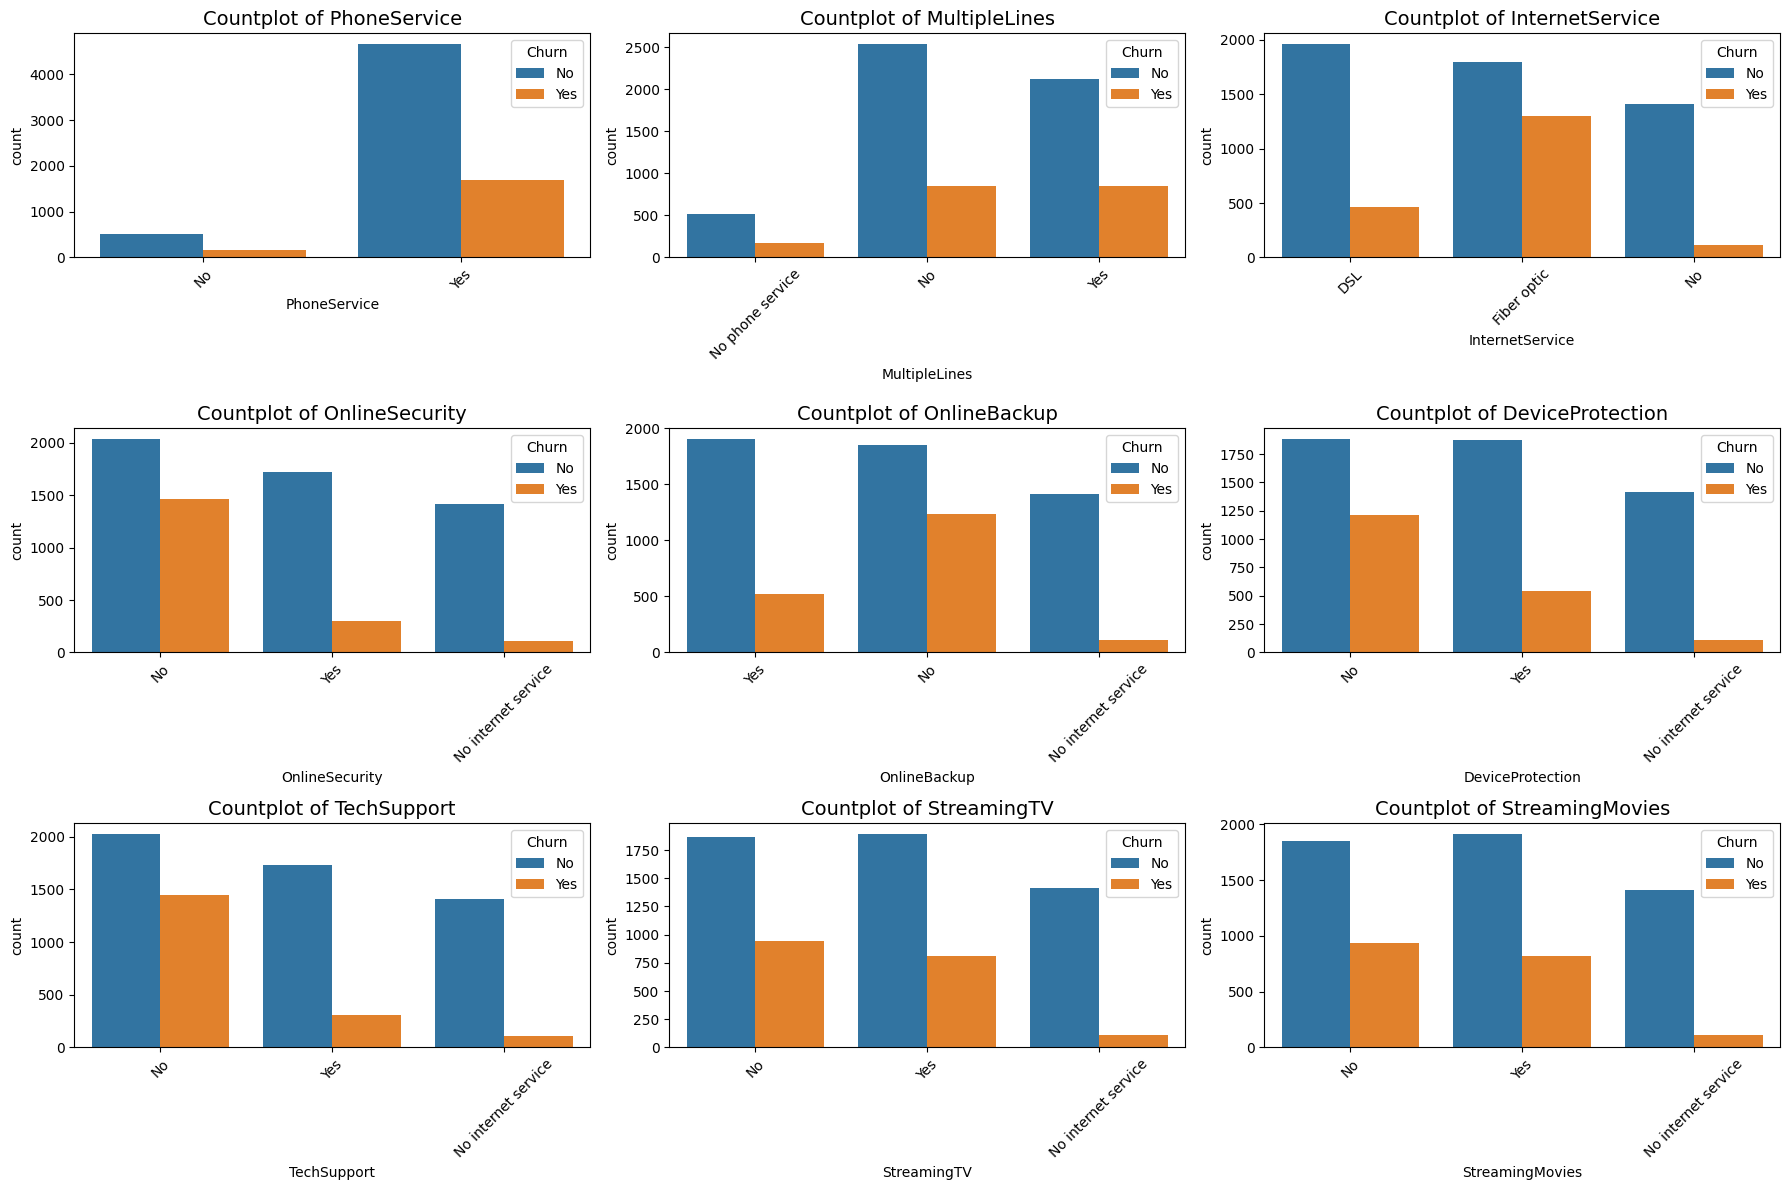

In [41]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = -(-len(service_cols) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(service_cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue=df['Churn'])
    axes[i].set_title(f'Countplot of {col}', fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Plot summary :-

The countplots reveal clear patterns in customer churn behavior across telecom services. Customers lacking services like OnlineSecurity, TechSupport, and DeviceProtection show noticeably higher churn rates, suggesting these features may contribute to retention. Those with Fiber optic Internet also exhibit elevated churn, possibly due to pricing or service issues. In contrast, customers with PhoneService and Streaming options tend to churn less, indicating these offerings may enhance satisfaction. Overall, service engagement appears closely tied to customer loyalty.


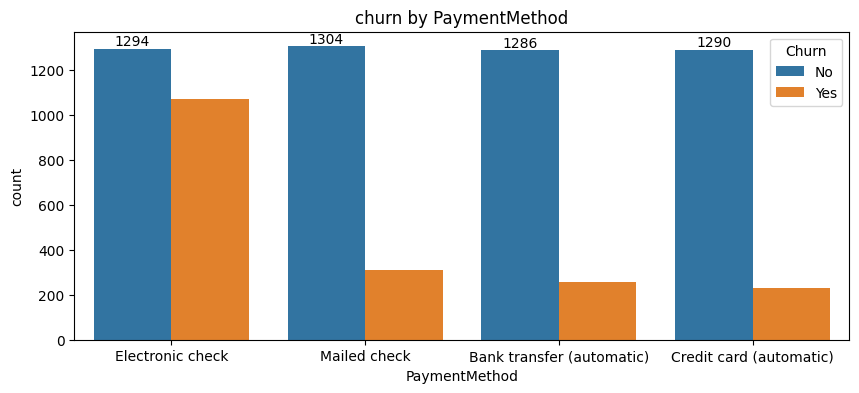

In [8]:
plt.figure(figsize=(10,4))
a=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
a.bar_label(a.containers[0])
plt.title('churn by PaymentMethod')
plt.show()


Plot summary :-

🔹 Electronic check shows highest churn
Customers using electronic checks have the largest number of churned users—nearly 1,000—indicating this method may be linked to lower retention.

🔹 Other payment methods have similar churn rates
Mailed check, bank transfer (automatic), and credit card (automatic) all show significantly lower churn, with around 300 churned customers each.

🔹 Retention is strong across most methods
For all payment types, the number of customers who did not churn is consistently high—around 1,290 to 1,304—suggesting overall customer satisfaction or loyalty.

🔹 Electronic check stands out as a potential risk factor
The stark contrast in churn rates between electronic check and other methods may warrant deeper investigation into user experience or demographic patterns.

🔹 Implication for strategy
Encouraging customers to switch from electronic checks to automatic payment methods might help reduce churn and improve retention.
